In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

init df

In [2]:
df = pd.read_csv('/kaggle/input/420hw02/Lawn_Data_FOR_CLUSTERING__v07.csv')

take a look at data

In [3]:
df

,D1,D2,D3,D4,D5,D6,D7,D8
0,3.0,3.6490,4.2111,5.1441,6.2757,6.8196,7.7992,7.9968
1,3.0,3.6282,4.4325,5.3521,5.7638,6.3261,7.3855,8.0752
2,3.0,3.4777,3.6749,3.7772,4.0290,4.1999,4.4425,4.6348
3,3.0,3.4104,3.6758,3.7247,3.8054,3.9039,3.9058,3.9058
4,3.0,3.2127,3.5515,3.7448,3.8081,3.9497,4.3106,4.4196
...,...,...,...,...,...,...,...,...
4995,3.0,3.2895,3.4338,3.6971,3.9692,4.0945,4.3641,4.7634
4996,3.0,3.3391,4.0152,4.0152,4.2887,4.4699,4.7965,4.9101
4997,3.0,3.1192,3.3819,3.4391,3.7223,4.2191,4.2191,4.5481
4998,3.0,3.1727,3.3821,3.7219,4.2900,4.6084,4.9814,5.4682


In [4]:
q = 0.1

> just use the last day

set absolute min bounds based on the floor of min

In [5]:
minn = df['D8'].min()
min_bound = int(minn)

set absolute max bounds based on the ceiling of max

In [6]:
maxx = df['D8'].max()
max_bound = int(maxx) + 1

create the range of vals from min->max iterating every q amt

In [7]:
range_of_vals = np.arange(min_bound, max_bound+q, q)

set number of bins

In [8]:
bins = range_of_vals.shape[0]

set a reference array of all zeros with same len of the range array

In [9]:
count_of_vals = np.zeros(range_of_vals.shape[0])

mapping function to get the amount of times q goes into val - min_bound -> this is the index it is between

In [10]:
def get_array_ind_ref(row):
    count_of_vals[int((row['D8'] - min_bound) / q)] += 1

In [11]:
df.apply(get_array_ind_ref, axis=1) # apply func

0       None
1       None
2       None
3       None
4       None
        ... 
4995    None
4996    None
4997    None
4998    None
4999    None
Length: 5000, dtype: object

ensure it equals 5000

In [12]:
count_of_vals.sum()

5000.0

set tick positions

In [13]:
tick_pos = [x for x in range(0, bins, int(bins/12))]

set tick vals

In [14]:
ticks = ['{:.2f}'.format(range_of_vals[x]) for x in tick_pos]

plot data

[Text(0.5, 0, 'Plant Length'),
 Text(0, 0.5, 'Frequency, or Counts'),
 [Text(0, 0, '3.00'),
  Text(7, 0, '3.70'),
  Text(14, 0, '4.40'),
  Text(21, 0, '5.10'),
  Text(28, 0, '5.80'),
  Text(35, 0, '6.50'),
  Text(42, 0, '7.20'),
  Text(49, 0, '7.90'),
  Text(56, 0, '8.60'),
  Text(63, 0, '9.30'),
  Text(70, 0, '10.00'),
  Text(77, 0, '10.70'),
  Text(84, 0, '11.40')]]

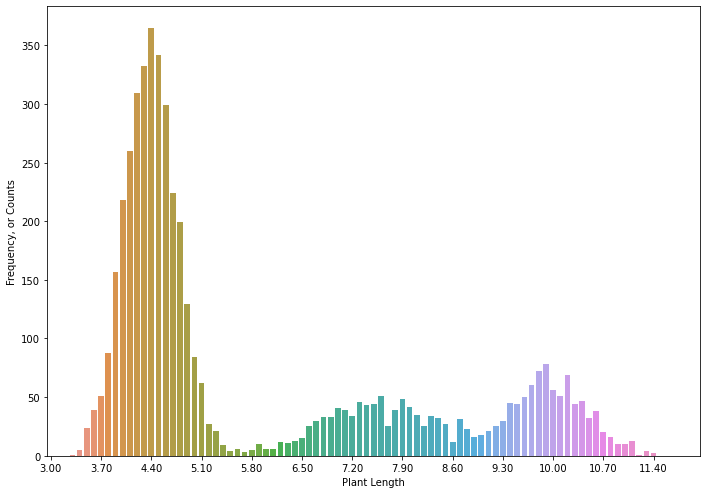

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

grass_count = sns.barplot(
    data=df,
    x=range_of_vals,
    y=count_of_vals,
    ax=ax
)

grass_count.set(
    xlabel='Plant Length', 
    ylabel='Frequency, or Counts',
    xticks=tick_pos,
    xticklabels=ticks
)